# 📊 Twitch Streaming Data Insights Project

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (replace with your actual file name if different)
df = pd.read_csv("english-2025-04-10T18-45-26.838Z.csv")

# Preview the data
print(df.head())




         handle  average_viewers  hours_streamed  total_followers  \
0      kaicenat           103655            65.9       16300000.0   
1  blastpremier            57122            96.0        2090000.0   
2       caseoh_            56525           102.4        6900000.0   
3       caedrel            54268           220.7        1220000.0   
4   pathofexile            47096             8.1         419000.0   

                      twitch_link  
0      https://twitch.tv/kaicenat  
1  https://twitch.tv/blastpremier  
2       https://twitch.tv/caseoh_  
3       https://twitch.tv/caedrel  
4   https://twitch.tv/pathofexile  


In [22]:
# Drop rows with missing data
df = df.dropna()

# Convert data types (in case they're strings)
df['average_viewers'] = pd.to_numeric(df['average_viewers'], errors='coerce')
df['hours_streamed'] = pd.to_numeric(df['hours_streamed'], errors='coerce')
df['total_followers'] = pd.to_numeric(df['total_followers'], errors='coerce')

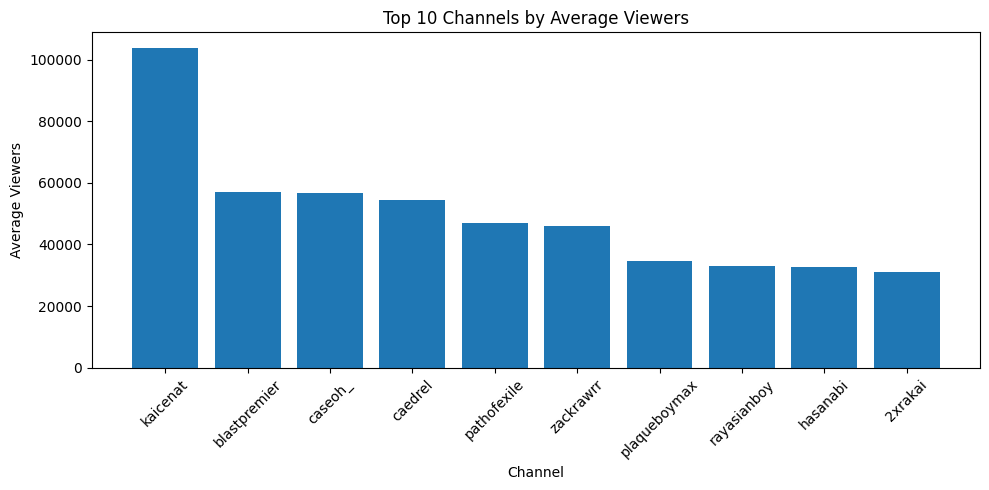

In [17]:
# Top 10 channels by average viewers
top_channels = df.sort_values(by='average_viewers', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_channels['handle'], top_channels['average_viewers'])
plt.title('Top 10 Channels by Average Viewers')
plt.xlabel('Channel')
plt.ylabel('Average Viewers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

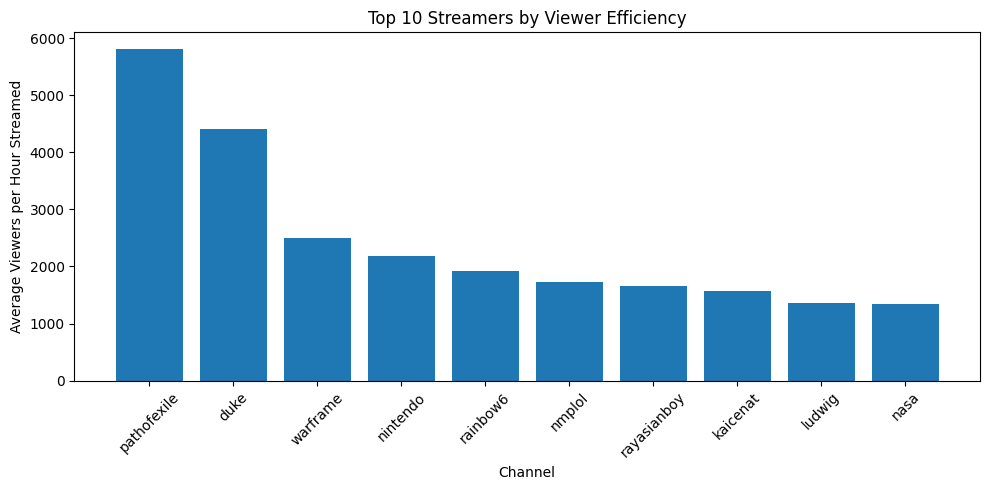

In [18]:
# Amount of views a stream got compared to how long the stream was
df['efficiency'] = df['average_viewers'] / df['hours_streamed']
efficient_streamers = df[df['hours_streamed'] > 0].sort_values(by='efficiency', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(efficient_streamers['handle'], efficient_streamers['efficiency'])
plt.title('Top 10 Streamers by Viewer Efficiency')
plt.xlabel('Channel')
plt.ylabel('Average Viewers per Hour Streamed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

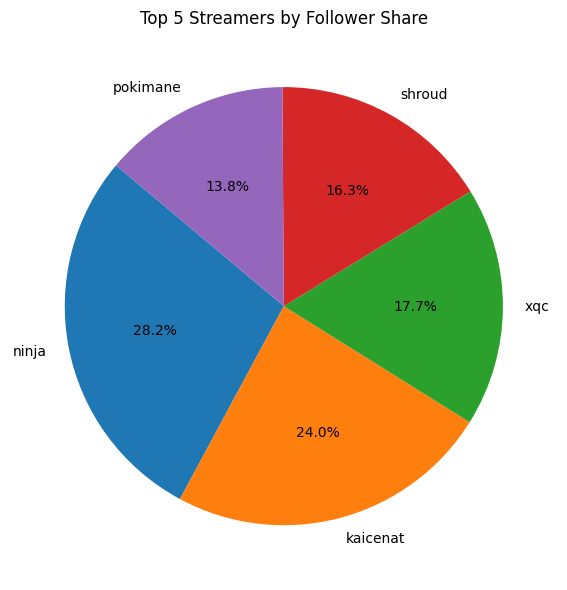

In [19]:
# This chart shows how total followers are distributed among the top 5 streamers.
top5_followers = df.sort_values(by='total_followers', ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(top5_followers['total_followers'], labels=top5_followers['handle'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Streamers by Follower Share')
plt.tight_layout()
plt.show()

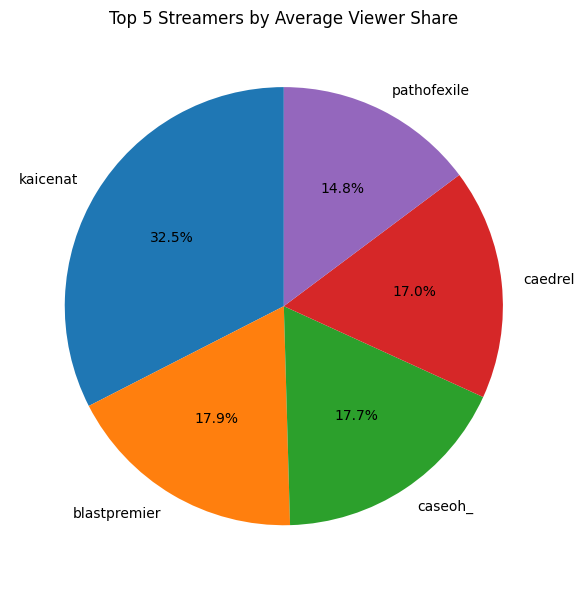

In [20]:
# This shows what portion of the total average viewers goes to each of the top 5
top5_viewers = df.sort_values(by='average_viewers', ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(top5_viewers['average_viewers'], labels=top5_viewers['handle'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Streamers by Average Viewer Share')
plt.tight_layout()
plt.show()

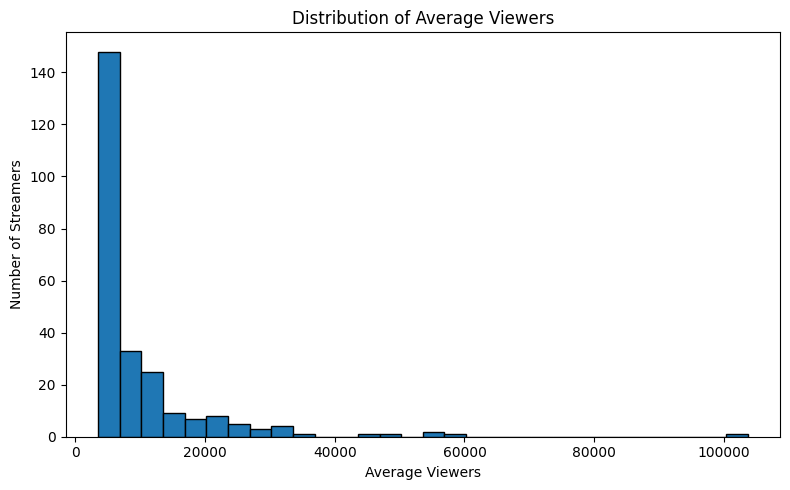

In [21]:
# Average Viewers Compared to How Many People Stream
plt.figure(figsize=(8,5))
plt.hist(df['average_viewers'], bins=30, edgecolor='black')
plt.title('Distribution of Average Viewers')
plt.xlabel('Average Viewers')
plt.ylabel('Number of Streamers')
plt.tight_layout()
plt.show()